In [ ]:
#Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader, TensorDataset
from google.colab import drive
import torchvision.models as models
from torchvision import transforms, datasets, models
from torch import nn, optim




In [ ]:
#To Mount Google Drive
drive.mount("/content/gdrive")
os.chdir("/content/gdrive/MyDrive/FYP")

Mounted at /content/gdrive


In [ ]:
#converting Videos into their Frames and saving them under a Folder of their Label#
import json
import numpy as np
import cv2
import os
import torchvision

def readVideo():

    glossList = []
    vidList = []
    bblst = []
    path = os.getcwd()
    content = json.load(open('WLASL_v0.3.json'))
    for ent in content:
        gloss = ent['gloss']
        instances = ent['instances']
        for inst in instances:
            split = inst['split']
            if split == "train":
                video = inst['video_id'] + ".mp4"
                x = inst['bbox']
                
                x1 = x[1]
                x2 = x[3]
                y1 = x[0]
                y2 = x[2]
                if os.path.isfile(str(video)):
                    
                    glossList.append(str(gloss))
                    vidList.append(str(video))
                    bblst.append([x1,x2,y1,y2])
    
    print("---------------------------")
    oldPath = os.getcwd()
    path = os.path.join(str(path),"Frames")
    print(path)

    i = 0            
    for j in vidList: #use this to get the video number
        newPath = os.path.join(path, str(glossList[i]))
        print(newPath)
        if not os.path.exists(newPath):
            os.mkdir(newPath)    
    
        vidcap = cv2.VideoCapture(j)
        os.chdir(newPath)
        print(os.getcwd())
        newPath2 = os.path.join(newPath, (j))
        #print(newPath2)
        if not os.path.exists(newPath2):
            os.mkdir(newPath2)
            os.chdir(newPath2)
        print(os.getcwd())
        #getting bbox of the vid
        t = bblst[i]
        x1 = t[0]
        x2 = t[1]
        y1 = t[2]
        y2 = t[3]
        success,image = vidcap.read()
        print(os.getcwd())
        count = 0
       
        while success:
            image = image[x1:x2,y1:y2]
            cv2.imwrite("frame%d.jpg" % count, image)
            success,image = vidcap.read()
            count += 1
        os.chdir(oldPath)
        print(os.getcwd())
        i+=1

        print("-----------------------------------------------")
readVideo()


In [ ]:
import os
import csv
###PATH.PY FOR CSV FILE
from google.colab import drive
drive.mount("/content/gdrive")

os.chdir("/content/gdrive/MyDrive/FYP")
print(os.listdir(os.getcwd()))
def image():
    imglbl = []
    imgPath = []
    tempPath = []
    imgFrm = []
    
    path = os.getcwd()
    print(path)
    newPath = "trainData/Samples"
    newPath = os.path.join(path, newPath)
    os.chdir(newPath)

    dirLen = len(os.listdir())
    imglbl.append(os.listdir())    
    os.chdir(path)

    with open('myCSV.csv', 'w', newline = '') as f:
        writer = csv.writer(f)
        writer.writerow(["Image_Label", "Image_Frames", "Image_Path"])
        for i in range(dirLen):
            x = imglbl[0][i]
            customPath = os.path.join(newPath, str(x))
            os.chdir(customPath)
            y = (os.listdir())
            for j in range(len(y)):
                imgPath.append(customPath + '/' + y[j])
                tempPath.append(imgPath[-1])
                os.chdir(tempPath[-1])
                imgFrm.append(len(os.listdir())-1)                
                writer.writerow([str(imglbl[0][i]), imgFrm[-1], imgPath[-1]])
image()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['trainData', 'myCSV.csv', 'myCSV.gsheet']
/content/gdrive/MyDrive/FYP


In [ ]:
#DATA LOADER MD 4
#Change Directory
os.chdir("/content/gdrive/MyDrive/FYP")
print(os.getcwd())

#Read CSV File
df = pd.read_csv('myCSV1.csv')
#Get CSV File Length
dfLen = len(df.index)+1

#Arrays Declarations
tensorList = []
labelList = []
label = ""

#Get Img Labels
imglblList = []
for column in df[['Image_Label']]:
    imglbl = df[column]
for i in imglbl.values:
    imglblList.append(i)

#Get Img Frames    
imgFramesList = []
for column in df[['Image_Frames']]:
    imgFrames = df[column]
for i in imgFrames.values:
    imgFramesList.append(i)
    
#Get Img Path
imgPathList = []
for column in df[['Image_Path']]:
    imgPath = df[column]
for i in imgPath.values:
    imgPathList.append(i)

X = df.Image_Path.values
y = df.Image_Label.values





/content/gdrive/MyDrive/FYP


In [ ]:
#########################################333 TO LOAD IMAGES FROM THEIR PATH ##################################################
trans = transforms.Compose([ transforms.ToTensor(),
                                                 transforms.Normalize(mean=[0.43216, 0.394666, 0.37645], std=[0.22803, 0.22145, 0.216989])])

#Open, Resize and Transform Images
def loader(imglbl, imgPath, imgFrames):
        tensorArr=[]
        imgDir = os.chdir(imgPath)
        print(imglbl)
        print(imgPath)
        print(imgFrames)
        print("=------------------------------------------------------------------------------------------=")
        for x in range(imgFrames):
            image = Image.open('frame'+str(x)+'.jpg')
            new_image = image.resize((32, 32))
            new_image2 = trans(new_image)
            tensorArr.append(new_image2)
        
        label = imglbl    
        return tensorArr, new_image2, label

#Image output and labels from loader will be stacked into a tensor
print(imglblList)

for i in range(dfLen-1):
    #Function call to loader
    tensorArr,x , label = loader(imglblList[i], imgPathList[i], imgFramesList[i])

    stackTensor = torch.stack(tensorArr)
    
    #Numpy Array of the TensorList
    tensorList.append(stackTensor)
    
    #Numpy Array of the LabelList
    labelList.append(label)




['a', 'a', 'a', 'a', 'abdomen', 'abdomen', 'abdomen', 'abdomen', 'a lot', 'a lot', 'a lot', 'a lot', 'able', 'able', 'able', 'able', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'above', 'above', 'above', 'above', 'accept', 'accept', 'accept', 'accept', 'accept', 'accept', 'accent', 'accent', 'accent', 'accent', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'across', 'across', 'across', 'across', 'across', 'across', 'across', 'act', 'act', 'act', 'act', 'act', 'accomplish', 'accomplish', 'accomplish', 'accomplish', 'accomplish', 'accomplish', 'accountant', 'accountant', 'accountant', 'accountant', 'accountant', 'action', 'action', 'action', 'action', 'active', 'active', 'active', 'active', 'active', 'activity', 'activity', 'activity', 'activity', 'activity', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'adapt', 'adapt', 'adapt', 'adapt', 'ada

In [ ]:
import numpy as np
os.chdir("/content/gdrive/MyDrive/FYP")
tensorList = np.load('tensorslast.npy',allow_pickle=True)



In [ ]:
from sklearn import preprocessing
labels = np.load('labelslast.npy',allow_pickle=True)
le = preprocessing.LabelEncoder()
le.fit(labels)
labels = le.transform(labels)

print(labels)


[  0   0   0 ... 100 100 100]


In [ ]:
os.chdir("/content/gdrive/MyDrive/FYP")
label_Words = np.load('labels_word.npy',allow_pickle=True)
print(label_Words)

['accident' 'africa' 'all' 'apple' 'basketball' 'bed' 'before' 'bird'
 'black' 'blue' 'book' 'bowling' 'brown' 'can' 'candy' 'cat' 'chair'
 'change' 'cheat' 'city' 'clothes' 'color' 'computer' 'cook' 'cool' 'corn'
 'cousin' 'cow' 'cry' 'dance' 'dark' 'deaf' 'decide' 'doctor' 'dog' 'door'
 'drink' 'enjoy' 'family' 'fine' 'finish' 'fish' 'forget' 'full' 'give'
 'go' 'graduate' 'hair' 'hat' 'hearing' 'help' 'hot' 'jacket' 'kiss'
 'knife' 'language' 'last' 'later' 'learn' 'letter' 'like' 'man' 'many'
 'medicine' 'meet' 'mother' 'no' 'now' 'orange' 'paint' 'paper' 'pink'
 'pizza' 'play' 'pull' 'purple' 'read' 'secretary' 'shirt' 'short' 'son'
 'study' 'table' 'tall' 'tell' 'thanksgiving' 'thin' 'thursday' 'time'
 'visit' 'wait' 'walk' 'want' 'what' 'white' 'who' 'woman' 'work' 'wrong'
 'year' 'yes']


In [ ]:
#os.chdir("/content/gdrive/MyDrive/FYP/trainData/Samples")
import torch.nn.utils.rnn as rnn
#Custom Dataloader
class signData(Dataset):
    def __init__(self, X, Y, transform = None):
        #X is TensorList as argument
        self.X = X
        #Y is LabelList as argument
        self.Y = Y
        
        if transform == 1:
            self.transform = transforms.Compose([transforms.ToTensor(),
                                                 transforms.Resize((128,128))
                                                 ,transforms.Normalize(mean=np.array([0.485, 0.456, 0.406]), std=np.array([0.229, 0.224, 0.225]))])
        
    def __len__(self):
        return len(self.X)

    def __getitem__(self,index):
        #Accessing every instance of NpTensorArr
        imageStack = self.X[index]
        #Accesing every instance of NpLabelList
        label = self.Y[index]
        return torch.from_numpy(imageStack), len(imageStack), label 


#Use my_collate for Image Batching and normalizing image sizes
def my_collate(batch):
    inputs = rnn.pad_sequence([s[0] for s in batch], padding_value=0.0)
    input_sizes = torch.LongTensor([s[1] for s in batch])
    target = torch.LongTensor([s[2] for s in batch])
    return inputs, input_sizes, target    



#Transform Images
trans = transforms.Compose([transforms.ToTensor(),transforms.Resize((128,128)),
                                                 transforms.Normalize(mean=np.array([0.485, 0.456, 0.406]), std=np.array([0.229, 0.224, 0.225]))])



In [ ]:

Data = signData(tensorList, labels, transform=1)

train,val = torch.utils.data.random_split(Data, [1300, 297], generator=torch.Generator().manual_seed(42))

train_arg = dict(batch_size=4, shuffle=True, collate_fn = my_collate) 

train_loader = DataLoader(train, **train_arg)

val_loader = DataLoader(val, **train_arg)



In [ ]:
#Model Intializing
model = torchvision.models.video.r3d_18(pretrained=True)


#Parameter for Model Optimizer
criterion = nn.CrossEntropyLoss()
lr=0.0001
weight_decay=0.0001
factor=0.316

#To transfer Model and Training from cpu to available gpu
device = "cuda" if torch.cuda.is_available() else "cpu"
import torch
torch.cuda.empty_cache()
import gc 
model.to(device)
criterion.to(device)

# Your code with pytorch using GPU 
optimizer = torch.optim.Adam(model.parameters(),lr=lr, weight_decay=weight_decay)
torch.cuda.memory_summary(device=device, abbreviated=False)


def train(n_epochs, model, optimizer, criterion):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf
    train_loss = 0.0
    valid_loss = 0.0  
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        
        ###################
        # train the model #
        ###################

        model.train()
        for batch_idx, (data, dsize, target) in enumerate(train_loader):
          device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
          data, target = data.to(device), target.to(device)
          # initialize weights to zero
          
          data = data.permute(1,2,0,3,4)  #Changing Shape to make it suitable for Resnet Input
          optimizer.zero_grad()
          output = model(data)
            # calculate loss
          loss = criterion(output, target)
          train_loss += loss.item() 
            # back prop
          loss.backward()
            
            # grad
          optimizer.step()
            
        train_loss /= len(train_loader)
            
        print('Training loss: %.3f' %(train_loss))
        with torch.no_grad():
          model.eval()
          val_loss = 0
          batch_id=0
          num_correct = 0
          num_samples = 0
          for X, X_lens, Y in val_loader:
            batch_id+=1
            X = X.permute(1,2,0,3,4)
            X = X.to(device)
            Y = Y.to(device)
            out = model(X)
            pre, predictions = torch.topk(out,1)
            i = 0
            for q in predictions:
              if Y[i] in predictions[i]:
                num_correct += 1
              i+=1

            num_samples += predictions.size(0)
            loss = criterion(out, Y)
            val_loss+=loss.item()
        val_lpw = val_loss / len(val_loader)
        print('Validation Loss: ', val_lpw)
        print("---------------------------------------------------------------------------")
        print(f'Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}')
        print("----------------------------------------------------------------------------")
        ape = float(num_correct)/float(num_samples)*100
    return train_loss, val_lpw, ape

gc.collect()   


Downloading: "https://download.pytorch.org/models/r3d_18-b3b3357e.pth" to /root/.cache/torch/hub/checkpoints/r3d_18-b3b3357e.pth



VideoResNet(
  (stem): BasicStem(
    (0): Conv3d(3, 64, kernel_size=(3, 7, 7), stride=(1, 2, 2), padding=(1, 3, 3), bias=False)
    (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Sequential(
        (0): Conv3DSimple(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
        (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
      (conv2): Sequential(
        (0): Conv3DSimple(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
        (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (relu): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Sequential(
        (0): Conv3DSimple(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
        (1)

117

In [ ]:
from tqdm import tqdm
acc = [] 
Train_loss = []
Test_loss = []
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=patience, factor=factor, verbose=True)
for i in tqdm(range(30)):
    train_loss, val_loss, ape = train(1,model,  optimizer, criterion)
    scheduler.step(val_loss)
    Train_loss.append(train_loss)
    Test_loss.append(val_loss)
    acc.append(ape)

  0%|          | 0/30 [00:00<?, ?it/s]

Training loss: 4.913


  3%|▎         | 1/30 [05:21<2:35:15, 321.23s/it]

Validation Loss:  4.282994316174434
---------------------------------------------------------------------------
Got 15 / 101 with accuracy 14.85
----------------------------------------------------------------------------
Training loss: 2.847


  7%|▋         | 2/30 [10:46<2:30:28, 322.44s/it]

Validation Loss:  3.6634969986402073
---------------------------------------------------------------------------
Got 28 / 101 with accuracy 27.72
----------------------------------------------------------------------------
Training loss: 1.694


 10%|█         | 3/30 [16:12<2:25:34, 323.49s/it]

Validation Loss:  3.266739171428176
---------------------------------------------------------------------------
Got 36 / 101 with accuracy 35.64
----------------------------------------------------------------------------
Training loss: 0.897


 13%|█▎        | 4/30 [21:41<2:20:54, 325.17s/it]

Validation Loss:  3.438067527917715
---------------------------------------------------------------------------
Got 40 / 101 with accuracy 39.60
----------------------------------------------------------------------------
Training loss: 0.373


 17%|█▋        | 5/30 [27:06<2:15:29, 325.19s/it]

Validation Loss:  3.6326481699943542
---------------------------------------------------------------------------
Got 43 / 101 with accuracy 42.57
----------------------------------------------------------------------------
Training loss: 0.207


 20%|██        | 6/30 [32:33<2:10:17, 325.73s/it]

Validation Loss:  3.3130152248419247
---------------------------------------------------------------------------
Got 36 / 101 with accuracy 35.64
----------------------------------------------------------------------------
Training loss: 0.176


 23%|██▎       | 7/30 [37:57<2:04:36, 325.09s/it]

Validation Loss:  3.4781729716521044
---------------------------------------------------------------------------
Got 43 / 101 with accuracy 42.57
----------------------------------------------------------------------------
Training loss: 0.198


 27%|██▋       | 8/30 [43:24<1:59:22, 325.57s/it]

Validation Loss:  4.125327135507877
---------------------------------------------------------------------------
Got 40 / 101 with accuracy 39.60
----------------------------------------------------------------------------
Training loss: 0.306


 30%|███       | 9/30 [48:48<1:53:48, 325.18s/it]

Validation Loss:  3.512879043280219
---------------------------------------------------------------------------
Got 36 / 101 with accuracy 35.64
----------------------------------------------------------------------------
Epoch     9: reducing learning rate of group 0 to 3.1600e-05.
Training loss: 0.123


 33%|███▎      | 10/30 [54:14<1:48:28, 325.43s/it]

Validation Loss:  2.835127715880617
---------------------------------------------------------------------------
Got 44 / 101 with accuracy 43.56
----------------------------------------------------------------------------
Training loss: 0.045


 37%|███▋      | 11/30 [59:41<1:43:12, 325.94s/it]

Validation Loss:  3.0222328075995812
---------------------------------------------------------------------------
Got 47 / 101 with accuracy 46.53
----------------------------------------------------------------------------
Training loss: 0.043


 40%|████      | 12/30 [1:05:06<1:37:44, 325.81s/it]

Validation Loss:  2.792414853779169
---------------------------------------------------------------------------
Got 47 / 101 with accuracy 46.53
----------------------------------------------------------------------------
Training loss: 0.038


 43%|████▎     | 13/30 [1:10:33<1:32:25, 326.18s/it]

Validation Loss:  2.825473044927304
---------------------------------------------------------------------------
Got 46 / 101 with accuracy 45.54
----------------------------------------------------------------------------
Training loss: 0.039


 47%|████▋     | 14/30 [1:16:00<1:27:02, 326.40s/it]

Validation Loss:  2.994335488631175
---------------------------------------------------------------------------
Got 46 / 101 with accuracy 45.54
----------------------------------------------------------------------------
Training loss: 0.035


 50%|█████     | 15/30 [1:21:27<1:21:37, 326.49s/it]

Validation Loss:  2.754933680479343
---------------------------------------------------------------------------
Got 48 / 101 with accuracy 47.52
----------------------------------------------------------------------------
Training loss: 0.034


 53%|█████▎    | 16/30 [1:26:52<1:16:05, 326.08s/it]

Validation Loss:  3.0772180328002343
---------------------------------------------------------------------------
Got 48 / 101 with accuracy 47.52
----------------------------------------------------------------------------
Training loss: 0.034


 57%|█████▋    | 17/30 [1:32:16<1:10:31, 325.53s/it]

Validation Loss:  2.772214834793256
---------------------------------------------------------------------------
Got 51 / 101 with accuracy 50.50
----------------------------------------------------------------------------
Training loss: 0.038


 60%|██████    | 18/30 [1:37:43<1:05:10, 325.85s/it]

Validation Loss:  2.9489701204001904
---------------------------------------------------------------------------
Got 49 / 101 with accuracy 48.51
----------------------------------------------------------------------------
Training loss: 0.041


 63%|██████▎   | 19/30 [1:43:10<59:48, 326.26s/it]  

Validation Loss:  3.8159331312546363
---------------------------------------------------------------------------
Got 40 / 101 with accuracy 39.60
----------------------------------------------------------------------------
Training loss: 0.055


 67%|██████▋   | 20/30 [1:48:38<54:27, 326.76s/it]

Validation Loss:  3.266842721746518
---------------------------------------------------------------------------
Got 46 / 101 with accuracy 45.54
----------------------------------------------------------------------------
Training loss: 0.053


 70%|███████   | 21/30 [1:54:05<49:02, 326.91s/it]

Validation Loss:  2.8758178654198465
---------------------------------------------------------------------------
Got 46 / 101 with accuracy 45.54
----------------------------------------------------------------------------
Epoch    21: reducing learning rate of group 0 to 9.9856e-06.
Training loss: 0.030


 73%|███████▎  | 22/30 [1:59:31<43:31, 326.49s/it]

Validation Loss:  2.650278370970717
---------------------------------------------------------------------------
Got 50 / 101 with accuracy 49.50
----------------------------------------------------------------------------
Training loss: 0.021


 77%|███████▋  | 23/30 [2:04:58<38:07, 326.75s/it]

Validation Loss:  2.7809740408108774
---------------------------------------------------------------------------
Got 46 / 101 with accuracy 45.54
----------------------------------------------------------------------------
Training loss: 0.023


 80%|████████  | 24/30 [2:10:23<32:37, 326.20s/it]

Validation Loss:  2.716257269709156
---------------------------------------------------------------------------
Got 44 / 101 with accuracy 43.56
----------------------------------------------------------------------------
Training loss: 0.021


 83%|████████▎ | 25/30 [2:15:50<27:11, 326.35s/it]

Validation Loss:  2.74047227927412
---------------------------------------------------------------------------
Got 48 / 101 with accuracy 47.52
----------------------------------------------------------------------------
Training loss: 0.020


 87%|████████▋ | 26/30 [2:21:17<21:46, 326.56s/it]

Validation Loss:  2.6920941449128666
---------------------------------------------------------------------------
Got 46 / 101 with accuracy 45.54
----------------------------------------------------------------------------
Training loss: 0.019


 90%|█████████ | 27/30 [2:26:43<16:18, 326.26s/it]

Validation Loss:  3.475253771130855
---------------------------------------------------------------------------
Got 48 / 101 with accuracy 47.52
----------------------------------------------------------------------------
Training loss: 0.014


 93%|█████████▎| 28/30 [2:32:07<10:51, 325.57s/it]

Validation Loss:  2.648325061568847
---------------------------------------------------------------------------
Got 47 / 101 with accuracy 46.53
----------------------------------------------------------------------------
Training loss: 0.026


 97%|█████████▋| 29/30 [2:37:34<05:26, 326.02s/it]

Validation Loss:  2.7212477830740123
---------------------------------------------------------------------------
Got 45 / 101 with accuracy 44.55
----------------------------------------------------------------------------
Training loss: 0.024


100%|██████████| 30/30 [2:42:57<00:00, 325.91s/it]

Validation Loss:  2.867851936759857
---------------------------------------------------------------------------
Got 45 / 101 with accuracy 44.55
----------------------------------------------------------------------------


In [ ]:
torch.save(model,"ff2")

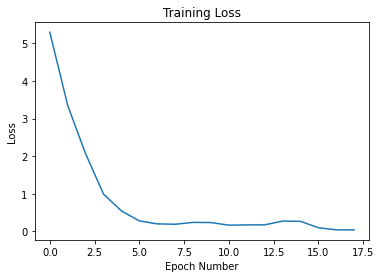

In [ ]:
plt.title('Training Loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(Train_loss)

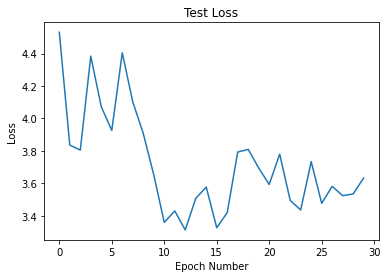

In [ ]:
plt.title('Test Loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(Test_loss)

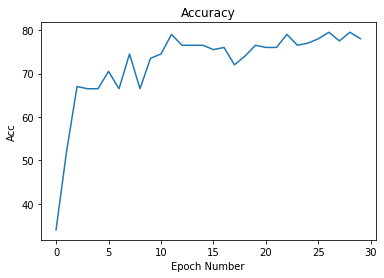

In [ ]:
plt.title('Accuracy')
plt.xlabel('Epoch Number')
plt.ylabel('Acc')
plt.plot(acc)

In [ ]:
import json
import numpy as np
import cv2
import os
import torchvision
import torch
torch.cuda.empty_cache()
import gc 

os.chdir("/content/gdrive/MyDrive/FYP")
label_Words = np.load('labels_word.npy',allow_pickle=True)

model = torchvision.models.video.r3d_18(pretrained=False)

model = torch.load("/content/gdrive/MyDrive/FYP/resnetmodel")

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

trans = transforms.Compose([transforms.ToTensor(),transforms.Resize((128,128)),
                                                 transforms.Normalize(mean=np.array([0.485, 0.456, 0.406]), std=np.array([0.229, 0.224, 0.225]))])

def vid_loader(video):
        tensorArr=[]
        frames = []
        imgDir = os.chdir("/content/gdrive/MyDrive/FYP/trainData")
        
        imgFrames = cv2.VideoCapture(video)
        success,image = imgFrames.read()
        while success:
          frames.append(image)
          success,image = imgFrames.read()
        for image in frames:
            new_image2 = trans(image)
            tensorArr.append(new_image2)
        
        return tensorArr

#Image output and labels from loader will be stacked into a tensor
video = ['cousin.mp4','hair.mp4','color.mp4','black.mp4']

#Function call to loader

tensorList= []

label = [] #dummy labels

for i in video:
  tensorArr= vid_loader(i)
  stackTensor = torch.stack(tensorArr)
  label.append(0)
  #Numpy Array of the TensorList
  tensorList.append(stackTensor)

tensors = []
tensors = [t.numpy() for t in tensorList] #changing List into a numpy Array


import torch.nn.utils.rnn as rnn
#Custom Dataloader
class signData(Dataset):
    def __init__(self, X, Y, transform = None):
        #X is TensorList as argument
        self.X = X
        #Y is LabelList as argument
        self.Y = Y
        
        if transform == 1:
            self.transform = transforms.Compose([transforms.ToTensor(),
                                                 transforms.Resize((128,128))
                                                 ,transforms.Normalize(mean=np.array([0.485, 0.456, 0.406]), std=np.array([0.229, 0.224, 0.225]))])
        
    def __len__(self):
        return len(self.X)

    def __getitem__(self,index):
        #Accessing every instance of NpTensorArr
        imageStack = self.X[index]
        #Accesing every instance of NpLabelList
        label = self.Y[index]
        return torch.from_numpy(imageStack), len(imageStack), label 

#Use my_collate for Image Batching and normalizing image sizes
def my_collate(batch):
    inputs = rnn.pad_sequence([s[0] for s in batch], padding_value=0.0)
    input_sizes = torch.LongTensor([s[1] for s in batch])
    target = torch.LongTensor([s[2] for s in batch])

    return inputs, input_sizes, target    



#Transform Images
trans = transforms.Compose([transforms.ToTensor(),transforms.Resize((128,128)),
                                                 transforms.Normalize(mean=np.array([0.485, 0.456, 0.406]), std=np.array([0.229, 0.224, 0.225]))])





x = signData(tensors,label)

    #Numpy Array of the TensorList
train_arg = dict(batch_size=len(x), shuffle=False, collate_fn = my_collate)
val_loader = DataLoader(x, **train_arg)
cnn_results= ''
model.eval()
for X, X_lens, Y in val_loader:
  X = X.permute(1,2,0,3,4)
  X = X.to(device)
  Y = Y.to(device)

  out = model(X)

  pre, predictions = torch.topk(out,1)
  for i in predictions:
    for x in i:
      cnn_results = cnn_results + label_Words[x]+' '
cnn_results = cnn_results[0:(len(cnn_results)-1)]
print(cnn_results)

cousin hair color black
